In [3]:
!pip3 install spotipy pandas matplotlib 


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
SPOTIPY_CLIENT_ID = "0f00975364f94920a8f4a74f76c8689e"
SPOTIPY_CLIENT_SECRET = "d65a717307b24808b4ec69e45a1ca809"

client_credentials_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,
                                                      client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [22]:
artist_name = []
track_name = []
popularity = []
track_id = []
images = []

for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2024', type='track', limit=50, offset=i)
    for t in track_results['tracks']['items']:
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        images.append(t['album']['images'][0]['url'])

In [23]:
artist_name = []
track_name = []
popularity = []
track_id = []
images = []

for i in range(0, 1000, 50):
    track_results = sp.search(q='year:2024', type='track', limit=50, offset=i)
    for t in track_results['tracks']['items']:
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
        images.append(t['album']['images'][0]['url'])
        

In [24]:
track_dataframe = pd.DataFrame({
    'Artist': artist_name,
    'Track': track_name,
    'Track ID': track_id,
    'Popularity': popularity,
    'Image URL': images
})

df_sorted = track_dataframe.sort_values(by='Popularity', ascending=False).reset_index(drop=True)

df_sorted.head(10)

,Artist,Track,Track ID,Popularity,Image URL
0,Lady Gaga,Die With A Smile,2plbrEY59IikOBgBGLjaoe,99,https://i.scdn.co/image/ab67616d0000b27382ea2e...
1,Billie Eilish,BIRDS OF A FEATHER,6dOtVTDdiauQNBQEDOtlAB,96,https://i.scdn.co/image/ab67616d0000b27371d62e...
2,Gracie Abrams,That’s So True,7ne4VBA60CxGM75vw0EYad,95,https://i.scdn.co/image/ab67616d0000b2731dac36...
3,ROSÉ,APT.,5vNRhkKd0yEAg8suGBpjeY,95,https://i.scdn.co/image/ab67616d0000b27336032c...
4,Billie Eilish,WILDFLOWER,3QaPy1KgI7nu9FJEQUgn6h,93,https://i.scdn.co/image/ab67616d0000b27371d62e...
5,Gigi Perez,Sailor Song,2262bWmqomIaJXwCRHr13j,93,https://i.scdn.co/image/ab67616d0000b273e6065f...
6,The Weeknd,Timeless (feat. Playboi Carti),1Es7AUAhQvapIcoh3qMKDL,92,https://i.scdn.co/image/ab67616d0000b27394f662...
7,Chappell Roan,"Good Luck, Babe!",0WbMK4wrZ1wFSty9F7FCgu,92,https://i.scdn.co/image/ab67616d0000b27391b4bc...
8,ROSÉ,APT.,4wJ5Qq0jBN4ajy7ouZIV1c,91,https://i.scdn.co/image/ab67616d0000b2735074bd...
9,KAROL G,Si Antes Te Hubiera Conocido,6WatFBLVB0x077xWeoVc2k,91,https://i.scdn.co/image/ab67616d0000b273491678...


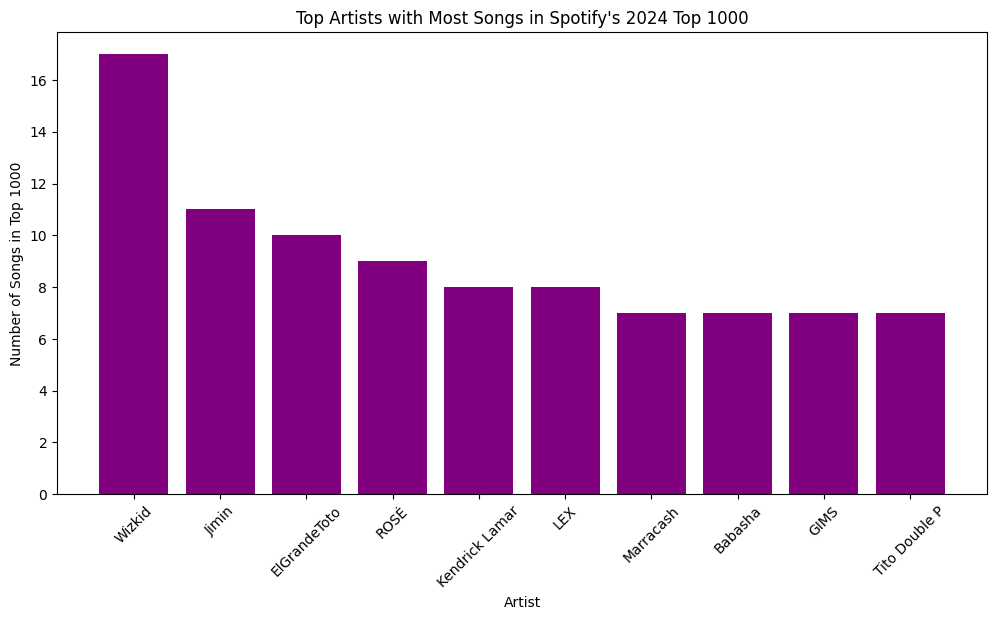

In [25]:
artist_counts = track_dataframe['Artist'].value_counts()
most_successful_artists = artist_counts.head(10)

plt.figure(figsize=(12,6))
plt.bar(most_successful_artists.index, most_successful_artists.values, color='purple')
plt.xlabel("Artist")
plt.ylabel("Number of Songs in Top 1000")
plt.title("Top Artists with Most Songs in Spotify's 2024 Top 1000")
plt.xticks(rotation=45)
plt.show()